# Problem 1: College Salaries

The following problem uses the Kaggle Dataset [Where it Pays to Attend College](https://www.kaggle.com/wsj/college-salaries/data). We are going to load in a CSV, create a dictionary based on the file contents, and then do some analysis.

This problem builds off of your Problem 1 from Week 2 (```02_python_advanced/problem_01.ipynb```. We will be graphing data using NumPy and Matplotlib.

Unzip the Kaggle dataset and move the folder into ```02_python_advanced/csvs/<your folder name>```. You can rename the folder if you like. Take a look at the CSV file by opening it up in Excel to get an idea of what the file looks like. Alternatively, you can open it up in a text editor; it's just easier to visualize in a spreadsheet program.

1. Copy the ```problem_01_fn.py``` file from last week into this week's folder. Also rename it.

    - In command prompt, if you are in the ```datasci-py/03_numpy``` folder, run:<br/>
       ```cp ../02_python_advanced/problem_01_fn.py problem_01_fn.py```<br/>
       ```cp -r ../02_python_advanced/csvs/college-salaries csvs/.```
       
    - If you are in the top-level ```datasci-py``` folder, run:<br/>
        ```cp 02_python_advanced/problem_01_fn.py 03_numpy/problem_01_fn.py```<br/>
        ```cp -r 02_python_advanced/csvs/college-salaries 03_numpy/csvs/.```
    
1. Now save the filepath in the block after you run the auto-reload block.

In [9]:
# the following code guarantees you'll properly reload any modules that you custom-defined in your environment.
# you don't need to understand it.
# just run this once at the beginning.
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from problem_01_fn_sol import *

In [10]:
college_dir = os.path.join('csvs', 'college-salaries') # edit this line if you saved it somewhere else
degrees_fpath = os.path.join(college_dir, 'degrees-that-pay-back.csv')
salaries_type_fpath = os.path.join(college_dir, 'salaries-by-college-type.csv')
salaries_region_fpath = os.path.join(college_dir, 'salaries-by-region.csv')

The following block runs the dictionary-loading code from last week.

In [11]:
salary_headers, degree_dict = load_degrees(degrees_fpath)
college_dict, type_to_colleges, region_to_colleges = load_colleges(salaries_type_fpath, salaries_region_fpath)

As a refresher for what the format of these objects look like:

* ```salary_headers```: a list of strings correponding to the header strings for your values (in other words, everything from "Starting Median Salary" onward)
* ```degree_dict```: a dictionary which has the following format:
    ```
    key: major, a string
    value: a list of floats corresponding to the numbers in each row **minus** the percent change from Starting to Mid-Career Salary
    ```

* ```college_dict```: a dictionary which has the following format:
    ```
    key: college, a string
    value: a list of floats corresponding to the numbers in each row
    ```
* ```type_to_colleges```: a dictionary mapping a school type to a list of colleges:
    ```
    key: school type, a string, like 'Engineering' or 'Party'
    value: a list of schools under that school type
    ```
* ```region_to_colleges```: a dictionary mapping a region to a list of colleges:
    ```
    key: region, a string, like 'Southern' or 'Northeastern'
    value: a list of schools in that region
    ```

You can run the following blocks as a sanity check to see if you loaded in the dictionaries correctly.

In [14]:
print(salary_headers) # ['Starting Median Salary', 'Mid-Career Median Salary', ...]
print(len(salary_headers)) # 6
print(degree_dict['Spanish']) # [34000.0, 53100.0, 56.2, ...]

['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']
6
[34000.0, 53100.0, 31000.0, 40000.0, 76800.0, 96400.0]


In [17]:
print(college_dict['Polytechnic University of New York, Brooklyn'])
print(college_dict['Cooper Union']) # should have -1 in place of N/A
print(college_dict['Massachusetts Institute of Technology (MIT)'])
print('School Name' not in college_dict) # should not have header information from file
print(sorted((region_to_colleges['California']))) # ['Cal Poly San Luis Obispo', ..., 'University of Southern California (USC)']
print(sorted(type_to_colleges['Party'])) # ['Arizona State University (ASU)', ..., 'West Virginia University (WVU)']

[62400.0, 114000.0, 66800.0, 94300.0, 143000.0, 190000.0]
[62200.0, 114000.0, -1, 80200.0, 142000.0, -1]
[72200.0, 126000.0, 76800.0, 99200.0, 168000.0, 220000.0]
True
['Cal Poly San Luis Obispo', 'California Institute of Technology (CIT)', 'California State University (CSU), Chico', 'California State University (CSU), Stanislaus', 'California State University, Dominguez Hills (CSUDH)', 'California State University, East Bay (CSUEB)', 'California State University, Fullerton (CSUF)', 'California State University, Long Beach (CSULB)', 'California State University, Northridge (CSUN)', 'California State University, Sacramento (CSUS)', 'Harvey Mudd College', 'Humboldt State University', 'Occidental College', 'Pomona College', 'San Diego State University (SDSU)', 'San Francisco State University (SFSU)', 'San Jose State University (SJSU)', 'Stanford University', 'Thomas Aquinas College', 'University of California at Los Angeles (UCLA)', 'University of California, Berkeley', 'University of Cal

## Exercise 1

Implement the ```random_key()``` function, which takes in a dictionary as an argument and returns a random key.

* It is best to use one of the ```np.random``` functions, like ```np.random.randint()``` or ```np.random.shuffle()```.
* If you are passed in an empty dictionary, you should return ```None```.
* ```d.keys()``` returns a **set**, not a list, so it does not support indexing. Instead, you should make sure to convert to list using ```list(d.keys())```.

In [18]:
# argument: d, a dictionary
# returns: a random key from the dictionary
def random_key(d):
    return None # replace this line

In [25]:
def random_key(d):
    if len(d) == 0: return None
    keys = list(d.keys())
    return keys[np.random.randint(len(d))]

In [29]:
print('empty dict', random_key({}))
print('random colleges:')
for i in range(10):
    print('college {}'.format(i), random_key(college_dict))

empty dict None
random colleges:
college 0 University of Colorado - Boulder (UCB)
college 1 University of Alabama at Huntsville (UAH)
college 2 University of Wisconsin (UW) - Madison
college 3 Montana State University - Billings
college 4 Jacksonville University
college 5 Polytechnic University of New York, Brooklyn
college 6 Swarthmore College
college 7 Niagara University
college 8 Union College
college 9 Georgia Institute of Technology


## Exercise 2

Implement the ```random_statistics()``` function that takes in a dictionary and its headers as arguments and returns a statistics printout of a random key. Use the ```random_key``` function you implemented above to help you out.

Example output:

```
>>> random_statistics(college_dict, salary_headers)
	Kent State University
Starting Median Salary:	38700.0
Mid-Career Median Salary:	62600.0
Mid-Career 10th Percentile Salary:	36100.0
Mid-Career 25th Percentile Salary:	45800.0
Mid-Career 75th Percentile Salary:	87000.0
Mid-Career 90th Percentile Salary:	124000.0
>>> random_statistics(degree_dict, salary_headers)
	Nutrition
Starting Median Salary:	39900.0
Mid-Career Median Salary:	55300.0
Mid-Career 10th Percentile Salary:	33900.0
Mid-Career 25th Percentile Salary:	44500.0
Mid-Career 75th Percentile Salary:	70500.0
Mid-Career 90th Percentile Salary:	99200.0
```

Hint: you might need to implement a for loop where you iterate over indices of ```headers```.

In [41]:
# arguments:
#     d, a dictionary
#     headers, a list of strings corresponding to the values list of this dictionary
# returns:
#     None (but prints out statistics)
def random_statistics(d, headers):
    key = random_key(d)
    print('\t{}'.format(key))
    for v, header in zip(d[key], headers):
        print('{}:\t{}'.format(header, v))

In [43]:
random_statistics(college_dict, salary_headers)

	Nutrition
Starting Median Salary:	39900.0
Mid-Career Median Salary:	55300.0
Mid-Career 10th Percentile Salary:	33900.0
Mid-Career 25th Percentile Salary:	44500.0
Mid-Career 75th Percentile Salary:	70500.0
Mid-Career 90th Percentile Salary:	99200.0


In [ ]:
random_statistics(degree_dict, salary_headers)

## Exercise 3

There is also another way to do this using the ```zip()``` function, which we haven't talked about yet. Recall the ```enumerate()``` function takes in a list and returns a tuple of (i, item), where i is the index, and item is the ith element in our list.

```zip(list1, list2)``` takes in multiple lists as argument (so you could do ```zip(arg1, arg2, arg3, ...)```) for as many arguments as you want) and returns a tuple of ```(elt1, elt2, ...)```, where for the ith tuple, the first element in the tuple is the ith element from the first list, the second element is the ith element from the second list, and so on.

An example is shown for you below.

In [45]:
list1 = range(10)
list2 = range(10, 20)
for elt1, elt2 in zip(list1, list2):
    print('list1: {}, list2: {}'.format(elt1, elt2))

list1: 0, list2: 10
list1: 1, list2: 11
list1: 2, list2: 12
list1: 3, list2: 13
list1: 4, list2: 14
list1: 5, list2: 15
list1: 6, list2: 16
list1: 7, list2: 17
list1: 8, list2: 18
list1: 9, list2: 19


Note that if the argument lists are different lengths, ```zip()``` only iterates through n times, where n is the minimum length across all lists.

In [47]:
list1 = range(10)
list2 = range(5)
list3 = range(300)
count = 0
for elt1, elt2, elt3 in zip(list1, list2, list3):
    count += 1
    print('{}: {}, {}, {}'.format(count, elt1, elt2, elt3))
print('iterated {} times'.format(count))

1: 0, 0, 0
2: 1, 1, 1
3: 2, 2, 2
4: 3, 3, 3
5: 4, 4, 4
iterated 5 times


```zip()``` and ```enumerate``` are often combined as follows:<br/>

```
for i, (elt1, elt2) in enumerate(zip(elt1, elt2)):
    # do stuff
    pass
```

So we can rewrite the above block like so:

In [49]:
list1 = range(10)
list2 = range(5)
list3 = range(300)
for i, (elt1, elt2, elt3) in enumerate(zip(list1, list2, list3)):
    print('{}: {}, {}, {}'.format(i+1, elt1, elt2, elt3))
print('iterated {} times'.format(i+1)) # but this isn't desirable, since you are referencing i outside of the for loop

1: 0, 0, 0
2: 1, 1, 1
3: 2, 2, 2
4: 3, 3, 3
5: 4, 4, 4
iterated 5 times


Now, implement ```random_statistics``` again, but this time using ```zip()``` on the values corresponding to your random key and the headers list.

In [ ]:
# arguments:
#     d, a dictionary
#     headers, a list of strings corresponding to the values list of this dictionary
# returns:
#     None (but prints out statistics)
def random_statistics(d, headers):
    pass

In [50]:
# for testing
random_statistics(college_dict, salary_headers)
print()
random_statistics(degree_dict, salary_headers)

	University of South Carolina
Starting Median Salary:	40000.0
Mid-Career Median Salary:	71700.0
Mid-Career 10th Percentile Salary:	36300.0
Mid-Career 25th Percentile Salary:	49900.0
Mid-Career 75th Percentile Salary:	98400.0
Mid-Career 90th Percentile Salary:	131000.0

	Forestry
Starting Median Salary:	39100.0
Mid-Career Median Salary:	62600.0
Mid-Career 10th Percentile Salary:	41000.0
Mid-Career 25th Percentile Salary:	49300.0
Mid-Career 75th Percentile Salary:	78200.0
Mid-Career 90th Percentile Salary:	111000.0


## Exercise 4: Preparing for Graphing

Before we start graphing, let's prepare our dataset by converting it into a NumPy array.

### Exercise 4(a)

Implement the ```dict_to_array(d)``` function that takes in a dictionary ```d``` as argument and returns two items: ```keys```, a list of keys, and ```value_arr```, a ```np.array()``` where the ith row corresponds to the values of the ith element in ```keys```.

Example output:

    >>>degrees, degree_arr = dict_to_array(degree_dict)
    >>>print(degrees[:10])
    >>>print(degree_arr[:10,:]
    ['Accounting', 'Aerospace Engineering', 'Agriculture', 'Anthropology', 'Architecture', 'Art History', 'Biology', 'Business Management', 'Chemical Engineering', 'Chemistry']
    [[ 46000.  77100.  42200.  56100. 108000. 152000.]
     [ 57700. 101000.  64300.  82100. 127000. 161000.]
     [ 42600.  71900.  36300.  52100.  96300. 150000.]
     [ 36800.  61500.  33800.  45500.  89300. 138000.]
     [ 41600.  76800.  50600.  62200.  97000. 136000.]
     [ 35800.  64900.  28800.  42200.  87400. 125000.]
     [ 38800.  64800.  36900.  47400.  94500. 135000.]
     [ 43000.  72100.  38800.  51500. 102000. 147000.]
     [ 63200. 107000.  71900.  87300. 143000. 194000.]
     [ 42600.  79900.  45300.  60700. 108000. 148000.]]

Notes:
* Ideally ```keys``` should be sorted. Recall that ```d.keys()``` returns a set, so you will need to convert it to a list, and then use ```sorted(keys)``` where ```keys``` is a list.

In [54]:
def dict_to_array(d):
    return [], np.array([]) # replace this line

In [63]:
def dict_to_array(d):
    keys = sorted(list(d.keys()))
    value_arr = np.array([d[key] for key in keys])
    return keys, value_arr

In [65]:
degrees, degree_arr = dict_to_array(degree_dict)
print('degrees', len(degrees)) # should print 50
print('arr shape', degree_arr.shape) # should print (50, 6)
print(degrees[:10])
print(degree_arr[:10,:])

degrees 50
arr shape (50, 6)
['Accounting', 'Aerospace Engineering', 'Agriculture', 'Anthropology', 'Architecture', 'Art History', 'Biology', 'Business Management', 'Chemical Engineering', 'Chemistry']
[[ 46000.  77100.  42200.  56100. 108000. 152000.]
 [ 57700. 101000.  64300.  82100. 127000. 161000.]
 [ 42600.  71900.  36300.  52100.  96300. 150000.]
 [ 36800.  61500.  33800.  45500.  89300. 138000.]
 [ 41600.  76800.  50600.  62200.  97000. 136000.]
 [ 35800.  64900.  28800.  42200.  87400. 125000.]
 [ 38800.  64800.  36900.  47400.  94500. 135000.]
 [ 43000.  72100.  38800.  51500. 102000. 147000.]
 [ 63200. 107000.  71900.  87300. 143000. 194000.]
 [ 42600.  79900.  45300.  60700. 108000. 148000.]]


In [66]:
colleges, college_arr = dict_to_array(college_dict)
print('degrees', len(colleges)) # should print 321
print('arr shape', college_arr.shape) # should print (321, 6)
print(colleges[:10])
print(college_arr[:10,:])

degrees 321
arr shape (321, 6)
['Adelphi University', 'American University, Washington D.C.', 'Amherst College', 'Appalachian State University', 'Arizona State University (ASU)', 'Arkansas State University (ASU)', 'Auburn University', 'Austin Peay State University', 'Ball State University (BSU)', 'Bates College']
[[ 4.06e+04  7.92e+04  4.42e+04  5.48e+04  1.14e+05  1.60e+05]
 [ 4.53e+04  9.08e+04  4.52e+04  6.24e+04  1.34e+05  1.69e+05]
 [ 5.45e+04  1.07e+05 -1.00e+00  8.49e+04  1.62e+05 -1.00e+00]
 [ 4.04e+04  6.91e+04  3.72e+04  5.04e+04  9.08e+04  1.15e+05]
 [ 4.74e+04  8.41e+04  4.46e+04  6.07e+04  1.14e+05  1.63e+05]
 [ 3.87e+04  6.33e+04  3.36e+04  4.53e+04  8.39e+04  1.18e+05]
 [ 4.54e+04  8.47e+04  4.54e+04  6.27e+04  1.09e+05  1.45e+05]
 [ 3.77e+04  5.92e+04  3.22e+04  4.05e+04  7.39e+04  9.62e+04]
 [ 3.91e+04  6.45e+04  3.55e+04  4.82e+04  8.93e+04  1.28e+05]
 [ 4.73e+04  9.65e+04 -1.00e+00  6.07e+04  1.62e+05 -1.00e+00]]


### Exercise 4(b)

Now, recall the two dictionaries ```region_to_colleges``` and ```type_to_colleges``` which take in a key like ```'California'``` or ```'Party'``` and return the colleges that are in that region or are under that category, respectively.

Implement a function ```get_college_indices(colleges, key_to_colleges, key)``` that does the following:

* Arguments:
    * ```colleges```, a list of colleges, like the one you would get from ```dict_to_array(college_dict)```
    * ```key_to_colleges```, a dictionary that looks like ```region_to_colleges``` or ```type_to_colleges```
    * ```key```, a key in ```key_to_colleges```
* Returns:
    * the indices of the ```colleges``` list that correspond to the colleges in ```key_to_colleges[key]```. Does not have to be a sorted list.
    
For example:

    >>>inds = get_college_indices(colleges, region_to_colleges, 'California')
    >>>print([colleges[i] for i in inds])
    ['Cal Poly San Luis Obispo', 'California Institute of Technology (CIT)', 'California State University (CSU), Chico', 'California State University (CSU), Stanislaus',..., 'University of Southern California (USC)']
    
Notes:
* One implementation is to use ```colleges.index(college)``` to return the index of ```college``` in the list ```colleges```, where ```college``` is in ```college_subset``` and ```college_subset``` is the list of colleges from ```key_to_colleges[key]```. This would involve using a list comprehension that looks like ```[x.index(y) for y in items]```.
* Another implementation is to iterate over the indices of ```colleges``` and check if ```colleges[i] in college_subset```, where ```college_subset``` is the list of colleges from ```key_to_colleges[key]```. This would involve using a list comprehension that looks like ```[i for i in range(len(x)) if x[i] in items]```

In [ ]:
def get_college_indices(colleges, key_to_colleges, key):
    return [] # a list of indices

In [67]:
def get_college_indices(colleges, key_to_colleges, key):
    college_subset = key_to_colleges[key]
    return [i for i in range(len(colleges)) if colleges[i] in college_subset]

In [69]:
inds = get_college_indices(colleges, region_to_colleges, 'California')
print([colleges[i] for i in inds])

['Cal Poly San Luis Obispo', 'California Institute of Technology (CIT)', 'California State University (CSU), Chico', 'California State University (CSU), Stanislaus', 'California State University, Dominguez Hills (CSUDH)', 'California State University, East Bay (CSUEB)', 'California State University, Fullerton (CSUF)', 'California State University, Long Beach (CSULB)', 'California State University, Northridge (CSUN)', 'California State University, Sacramento (CSUS)', 'Harvey Mudd College', 'Humboldt State University', 'Occidental College', 'Pomona College', 'San Diego State University (SDSU)', 'San Francisco State University (SFSU)', 'San Jose State University (SJSU)', 'Stanford University', 'Thomas Aquinas College', 'University of California at Los Angeles (UCLA)', 'University of California, Berkeley', 'University of California, Davis', 'University of California, Irvine (UCI)', 'University of California, Riverside (UCR)', 'University of California, San Diego (UCSD)', 'University of Cal

## Exercise 5: Graphing

Now, we are going to use your ```dict_to_array``` functions that you implemented in the previous exercises to graph some interesting information. First, run the following block to make sure that all the variables that are using will be consistent.

In [72]:
salary_headers, degree_dict = load_degrees(degrees_fpath)
college_dict, type_to_colleges, region_to_colleges = load_colleges(salaries_type_fpath, salaries_region_fpath)
degrees, degree_arr = dict_to_array(degree_dict)
colleges, college_arr = dict_to_array(college_dict)

# note I typo'ed MID_SAL as MED_SAL so this fixes for that
START_SAL, MID_SAL, MID_10, MID_25, MID_75, MID_90 = range(6)

### Exercise 5(a)

Now fill in the missing parts of the below function and plot the median mid-career salaries vs the median starting salaries of each degree.

Notes: 
* You can use the constants ```START_SAL``` and ```MID_SAL``` to reference a column from your numpy array.
* Use ```plt.scatter()```, which plots a scatter plot, not ```plt.plot()```.

In [73]:
def midcareer_vs_starting_degree(degree_dict):
    fig = plt.figure() # create a new figure
    degrees, degree_arr = dict_to_array(degree_dict)
    
    # fill in this information here using an indexing call to degree_arr
    start_salary = [] # REPLACE THIS LINE, use START_SAL
    mid_salary = [] # REPLACE THIS LINE, use MID_SAL
    
    # write a single line that calls plt.scatter()
    # YOUR LINE HERE
    
    # adds x and y labels and a title
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of college degrees')
    plt.show()

midcareer_vs_starting_degree(degree_dict)

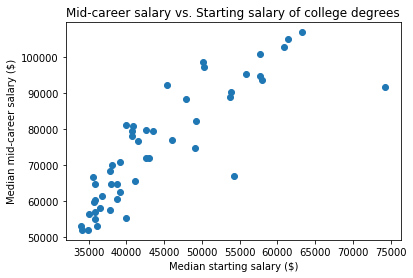

In [74]:
def midcareer_vs_starting_degree(degree_dict):
    fig = plt.figure() # create a new figure
    degrees, degree_arr = dict_to_array(degree_dict)
    
    # fill in this information here using an indexing call to degree_arr
    start_salary = degree_arr[:,START_SAL] # REPLACE THIS LINE, use START_SAL
    mid_salary = degree_arr[:,MID_SAL] # REPLACE THIS LINE, use MID_SAL
    
    # write a single line that calls plt.scatter()
    plt.scatter(start_salary, mid_salary)
    
    # adds x and y labels and a title
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of college degrees')
    plt.show()
    
midcareer_vs_starting_degree(degree_dict)

### Exercise 5(b)

Now, implement a function that plots the same type of scatter plot but for colleges themselves. In other words, graph a scatter plot titled "Mid-career salary vs. Starting salary by college."

Notes: 
* You can use the constants ```START_SAL``` and ```MID_SAL``` to reference a column from your numpy array.
* Use ```plt.scatter()```, which plots a scatter plot, not ```plt.plot()```.

In [75]:
def midcareer_vs_starting_college(college_dict):
    pass

## Exercise 6(a)

While the previous exercise allowed us to graph cool things, it didn't actually tell us anything useful about the data, because our scatter plots didn't have any labels corresponding to meaningful categories about the colleges or degrees. For this question, we are going to make use of the ```random_key``` and ```get_college_indices``` functions and the ```type_to_colleges``` and ```region_to_colleges``` dictionaries to label and show legends.

In [ ]:
def random_college_plot(college_dict, num_colleges):
    colleges, college_arr = dict_to_array(college_dict)
    for i in range(num_colleges):
        college = random_key(college_dict)
        # plot (using plt.scatter())
        # also include the label of your dictionary by using the name=... parameter in scatter.
        # YOUR CODE HERE
        # 
   # adds x and y labels and a title
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of random colleges')
    plt.show()
    
def random_degree_plot(degree_dict, num_degrees):
    degrees, degree_arr = dict_to_array(degree_dict)
    for i in range(num_degrees):
        degree = random_key(degree_dict)
        # plot (using plt.scatter())
        # also include the label of your dictionary by using the name=... parameter in scatter.
        # YOUR CODE HERE
        # 
   # adds x and y labels and a title
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of random degrees')
    plt.show()

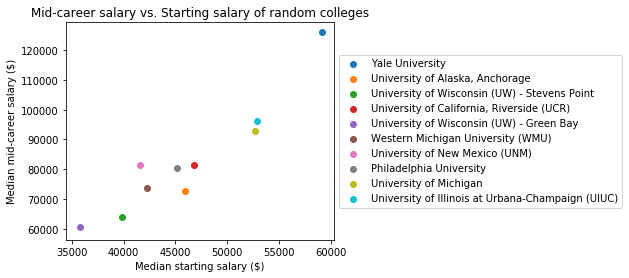

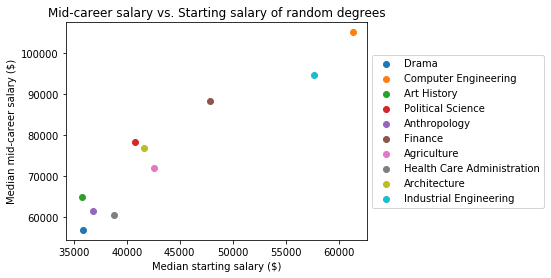

In [83]:
def random_college_plot(college_dict, num_colleges):
    fig = plt.figure()
    ax = plt.gca()
    colleges, college_arr = dict_to_array(college_dict)
    for i in range(num_colleges):
        college = random_key(college_dict)
        # plot (using plt.scatter())
        # also include the label of your dictionary by using the label=... parameter in scatter.
        row = college_arr[colleges.index(college)]
        plt.scatter(row[START_SAL], row[MED_SAL], label=college)
    # adds x and y labels and a title
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of random colleges')

    # positions legend outside plot area
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    
def random_degree_plot(degree_dict, num_degrees):
    fig = plt.figure()
    ax = plt.gca()
    degrees, degree_arr = dict_to_array(degree_dict)
    for i in range(num_degrees):
        degree = random_key(degree_dict)
        # plot (using plt.scatter()) a single dictionary.
        # also include the label of your dictionary by using the label=... parameter in scatter.
        # YOUR CODE HERE
        row = degree_arr[degrees.index(degree)]
        plt.scatter(row[START_SAL], row[MED_SAL], label=degree)
   # adds x and y labels and a title
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of random degrees')

    # positions legend outside plot area
    # Shrink current axis by 10%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

random_college_plot(college_dict, 10)
random_degree_plot(degree_dict, 10)

## Exercise 6(b)

Fill in the following two functions to graph Mid-career salaries vs. Starting career salaries of colleges by type and by region. Make use of the ```get_college_indices``` functions and the ```type_to_colleges``` and ```region_to_colleges``` dictionaries to label and show legends.

**Note** <br/>
You may find that you cannot see all the colored points on your scatter. This is because ```plt.scatter()``` default sets the **alpha** to 1.0, which means it paints with 100% opacity (alpha=0.0 would be 100% transparency, 0% opacity). To reduce the alpha value of your scatter:

    plt.scatter(xs, ys, alpha=0.5, label=label) # plots ys vs xs with 50% transparency and labeled label

In [ ]:
def salaries_by_region_plot(college_dict, region_to_colleges):
    fig = plt.figure()
    ax = plt.gca()
    colleges, college_arr = dict_to_array(college_dict)

    ## YOUR CODE HERE
    # USE get_college_indices() and your region_to_colleges dictionary
    # Change your alpha value if necessary

    
    ## END YOUR CODE
    
    # positions legend outside plot area
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Adds labels
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of colleges by region')
    plt.show()

def salaries_by_type_plot(college_dict, type_to_colleges):
    fig = plt.figure()
    ax = plt.gca()
    colleges, college_arr = dict_to_array(college_dict)

    ## YOUR CODE HERE
    # USE get_college_indices() and your type_to_colleges dictionary
    # Change your alpha value if necessary

    
    ## END YOUR CODE
    
    # positions legend outside plot area
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Adds labels
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of colleges by region')
    plt.show()
    
salaries_by_region_plot(college_dict, region_to_colleges)
salaries_by_type_plot(college_dict, type_to_colleges)

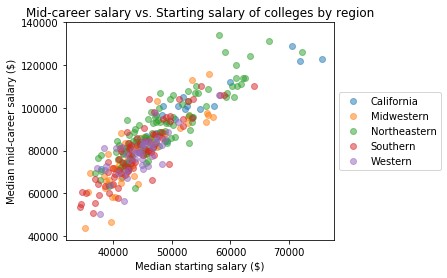

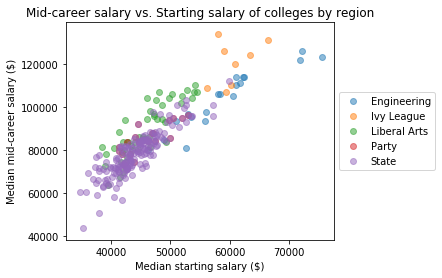

In [85]:
def salaries_by_region_plot(college_dict, region_to_colleges):
    fig = plt.figure()
    ax = plt.gca()
    colleges, college_arr = dict_to_array(college_dict)

    ## YOUR CODE HERE
    ## USE get_college_indices() and your region_to_colleges dictionary
    for key in sorted(region_to_colleges):
        region_inds = get_college_indices(colleges, region_to_colleges, key)
        region_start = college_arr[region_inds, START_SAL]
        region_mid = college_arr[region_inds, MID_SAL]
        plt.scatter(region_start, region_mid, label=key, alpha=0.5)
    ## END YOUR CODE
    
    # positions legend outside plot area
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Adds labels
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of colleges by region')
    plt.show()

def salaries_by_type_plot(college_dict, type_to_colleges):
    fig = plt.figure()
    ax = plt.gca()
    colleges, college_arr = dict_to_array(college_dict)

    ## YOUR CODE HERE
    ## USE get_college_indices() and your type_to_colleges dictionary
    for key in sorted(type_to_colleges):
        type_inds = get_college_indices(colleges, type_to_colleges, key)
        type_start = college_arr[type_inds, START_SAL]
        type_mid = college_arr[type_inds, MID_SAL]
        plt.scatter(type_start, type_mid, label=key, alpha=0.5)
    ## END YOUR CODE
    
    # positions legend outside plot area
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Adds labels
    plt.xlabel('Median starting salary ($)')
    plt.ylabel('Median mid-career salary ($)')
    plt.title('Mid-career salary vs. Starting salary of colleges by type')
    plt.show()
    
salaries_by_region_plot(college_dict, region_to_colleges)
salaries_by_type_plot(college_dict, type_to_colleges)